In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# A credit score is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual (Insurance, Housing options)
# Savings account, debit card or credit card
# Tenure is the period or duration for which the loan amount is sanctioned.

In [4]:
path = 'Churn_Modelling.csv'
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.to_excel('churn.xlsx')

In [23]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.shape[0], df.CustomerId.nunique()

(10000, 10000)

In [6]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [10]:
df['SalaryPercentage'] = df.Balance / df.EstimatedSalary * 100
df['SalaryPercentage'] = df['SalaryPercentage'].round(2)

In [11]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryPercentage
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.00
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,74.47
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,140.14
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.00
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,158.71
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,75.96
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0.00
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,96.40
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,189.55
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,187.66


In [12]:
data = df.iloc[:, 3:15]

# Categorical Data Analysis

Text(0, 0.5, 'IsActiveMember')

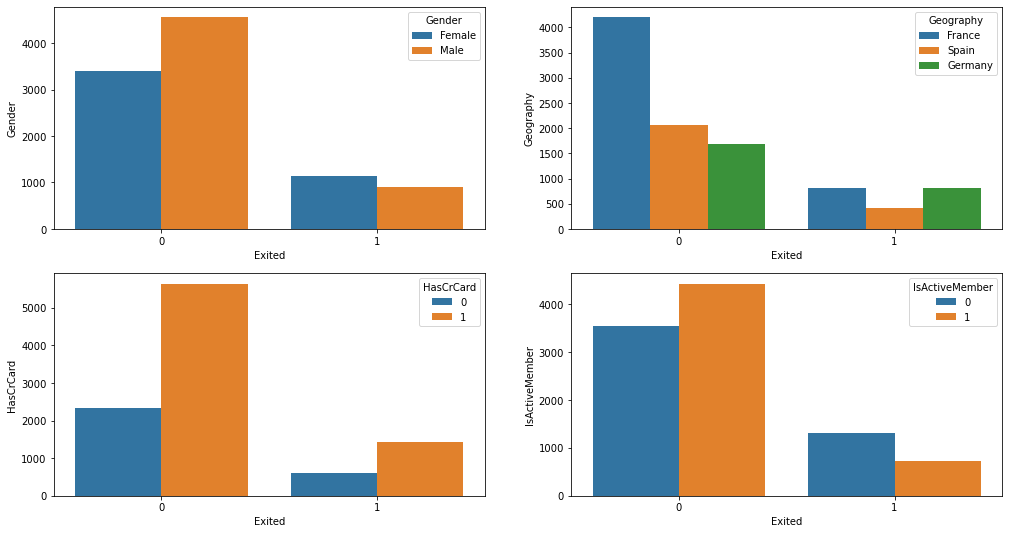

In [13]:
plt.figure(figsize = (17, 9))

plt.subplot(2,2,1)
sns.countplot(x = 'Exited', hue = 'Gender', data = data)
plt.ylabel('Gender')

plt.subplot(2,2,2)
sns.countplot(x = 'Exited', hue = 'Geography', data = data)
plt.ylabel('Geography')

plt.subplot(2,2,3)
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = data)
plt.ylabel('HasCrCard')

plt.subplot(2,2,4)
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = data)
plt.ylabel('IsActiveMember')

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

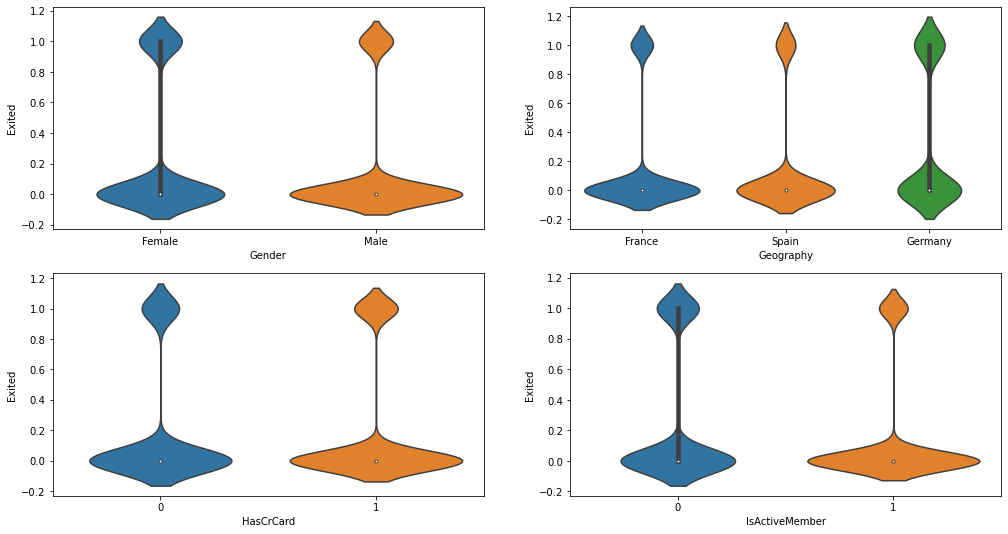

In [19]:
plt.figure(figsize = (17, 9))

plt.subplot(2,2,1)
sns.violinplot(y = 'Exited', x = 'Gender', data = data)

plt.subplot(2,2,2)
sns.violinplot(y = 'Exited', x = 'Geography', data = data)

plt.subplot(2,2,3)
sns.violinplot(y = 'Exited', x = 'HasCrCard', data = data)

plt.subplot(2,2,4)
sns.violinplot(y = 'Exited', x = 'IsActiveMember', data = data)


In [12]:
def countplot_percentages(data, IV, DV):
    """
    Pass in dataframe, one independent and one dependent variable. 
    They both should be categorical data and there should be no null values in the dataset
    """
    try:
        for iv_val in data[IV].unique(): 
            for dv_val in data[DV].unique():

                value = data[data[IV] == iv_val][DV].value_counts()[dv_val]
                print(f'{iv_val} {dv_val} Percentage --> {100 * value / (data[IV].value_counts()[iv_val])}')
    except KeyError:
        pass
    

In [13]:
countplot_percentages(data, 'Gender', 'Exited')
print('\n')

countplot_percentages(data, 'Geography', 'Exited')
print('\n')

countplot_percentages(data, 'HasCrCard', 'Exited')
print('\n')

countplot_percentages(data, 'IsActiveMember', 'Exited')

Female 1 Percentage --> 25.071538630860665
Female 0 Percentage --> 74.92846136913934
Male 1 Percentage --> 16.455928165658786
Male 0 Percentage --> 83.54407183434121


France 1 Percentage --> 16.15476665337056
France 0 Percentage --> 83.84523334662944
Spain 1 Percentage --> 16.67339523617279
Spain 0 Percentage --> 83.3266047638272
Germany 1 Percentage --> 32.44320446392985
Germany 0 Percentage --> 67.55679553607014


1 1 Percentage --> 20.184266477675408
1 0 Percentage --> 79.81573352232459
0 1 Percentage --> 20.814940577249576
0 0 Percentage --> 79.18505942275043


1 1 Percentage --> 14.269073966220152
1 0 Percentage --> 85.73092603377985
0 1 Percentage --> 26.850897092183956
0 0 Percentage --> 73.14910290781604


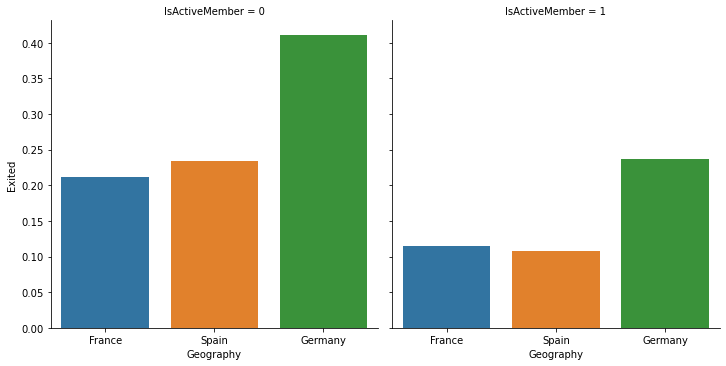

In [14]:
sns.catplot(x="Geography", y="Exited", col="IsActiveMember", data=df, kind = 'bar', ci=None)

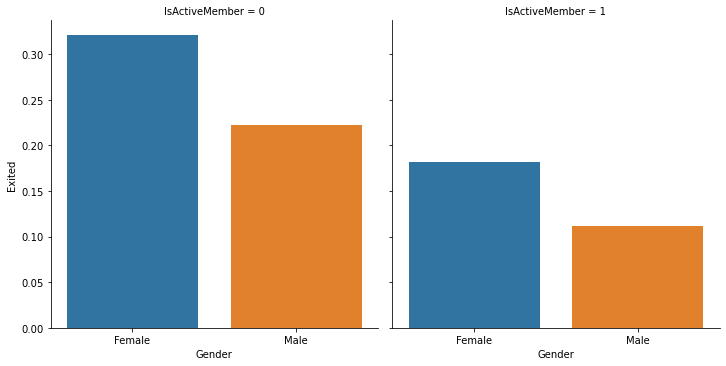

In [15]:
sns.catplot(x="Gender", y="Exited", col="IsActiveMember", data=df, kind = 'bar', ci=None)

# Numerical Data Analysis

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

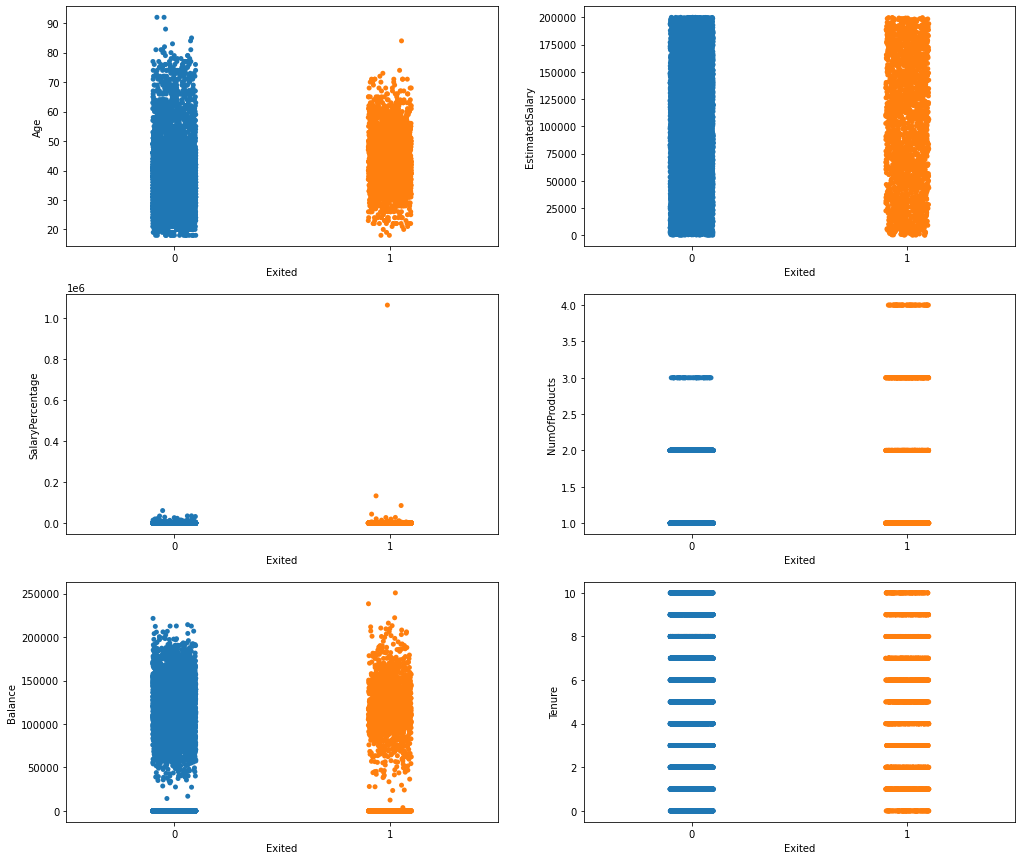

In [16]:
plt.figure(figsize = (17, 15))

plt.subplot(3,2,1)
sns.stripplot(x = 'Exited', y = 'Age', data = data)

plt.subplot(3,2,2)
sns.stripplot(x = 'Exited', y = 'EstimatedSalary', data = data)

plt.subplot(3,2,3)
sns.stripplot(x = 'Exited', y = 'SalaryPercentage', data = data)

plt.subplot(3,2,4)
sns.stripplot(x = 'Exited', y = 'NumOfProducts', data = data)

plt.subplot(3,2,5)
sns.stripplot(x = 'Exited', y = 'Balance', data = data)

plt.subplot(3,2,6)
sns.stripplot(x = 'Exited', y = 'Tenure', data = data)

<AxesSubplot:>

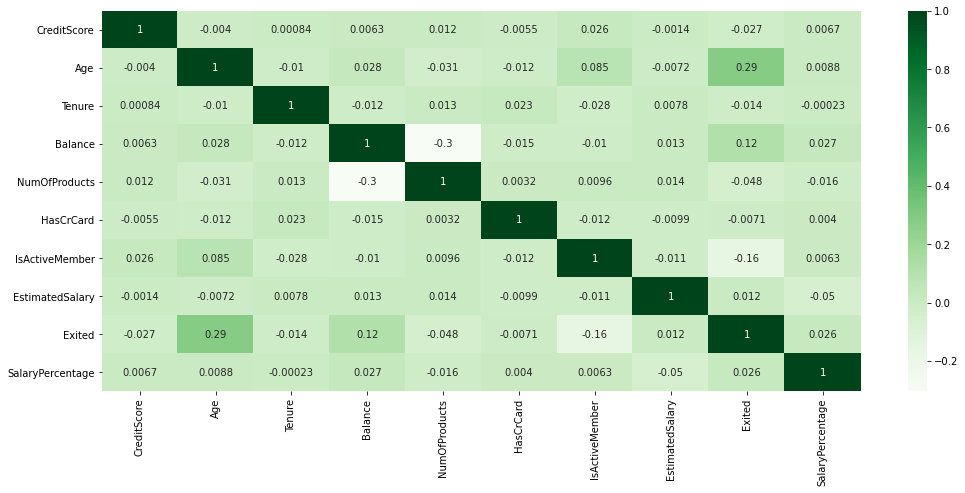

In [17]:
plt.figure(figsize = (17,7))
sns.heatmap(data.corr(), annot = True, cmap = 'Greens')

# Normality & Homoscedasticity

In [18]:
values = [val for val in data.skew()]
skewness = pd.DataFrame({'Feature':list(data.skew().keys()), 'Skewness': values})
skewness

,Feature,Skewness
0,CreditScore,-0.071607
1,Age,1.011320
2,Tenure,0.010991
3,Balance,-0.141109
4,NumOfProducts,0.745568
5,HasCrCard,-0.901812
6,IsActiveMember,-0.060437
7,EstimatedSalary,0.002085
8,Exited,1.471611
9,SalaryPercentage,94.264022


In [19]:
data.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
SalaryPercentage    float64
dtype: object

In [79]:
array = data.drop(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'], axis = 1)

In [80]:
from scipy.stats import shapiro
array = np.array(array)
shapiro(array)

ShapiroResult(statistic=0.5506062507629395, pvalue=0.0)

Text(0.5, 1.0, 'Log Age')

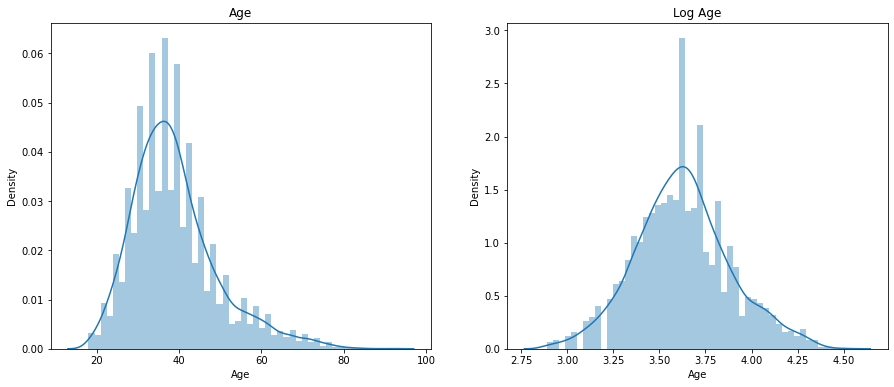

In [22]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.distplot(data.Age)
plt.title('Age')

plt.subplot(1,2,2)
sns.distplot(np.log(data.Age))
plt.title('Log Age')

# Building the Model

In [23]:
dummies = pd.get_dummies(data, drop_first = True)

In [55]:
y = dummies['Exited']
X = dummies.drop('Exited', axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression

In [69]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

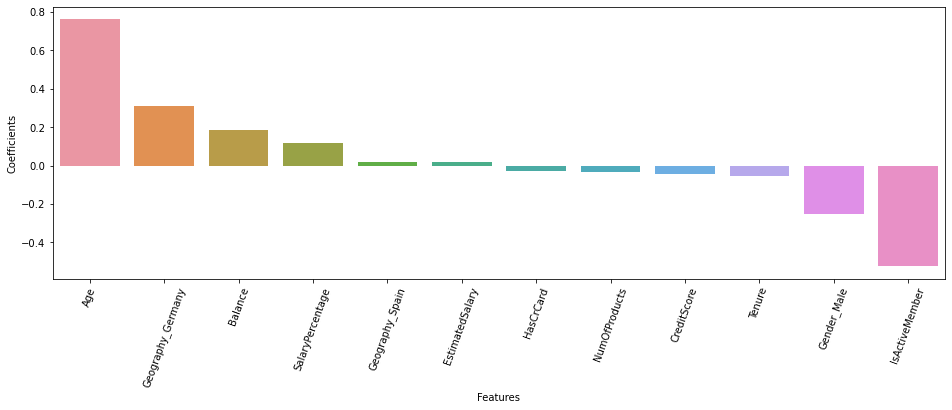

In [70]:
coef = np.reshape(classifier.coef_, (12,))
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': coef}).sort_values('Coefficients', ascending = False)

plt.figure(figsize = (16,5))
sns.barplot(x = 'Features', y = 'Coefficients', data = coefficients)
plt.xticks(rotation = 70);

In [71]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

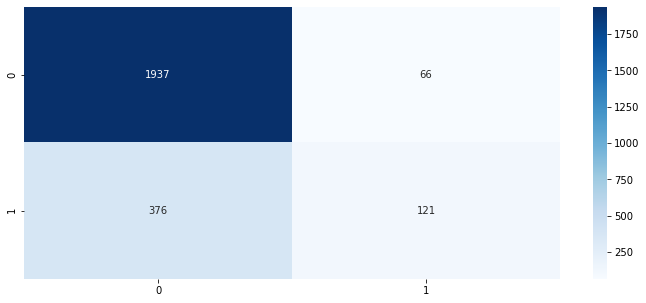

In [72]:
plt.figure(figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Blues',fmt='.4g')

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2003
           1       0.65      0.24      0.35       497

    accuracy                           0.82      2500
   macro avg       0.74      0.61      0.63      2500
weighted avg       0.80      0.82      0.79      2500



# Random Forest Classifier

In [74]:
classifier =RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

In [75]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

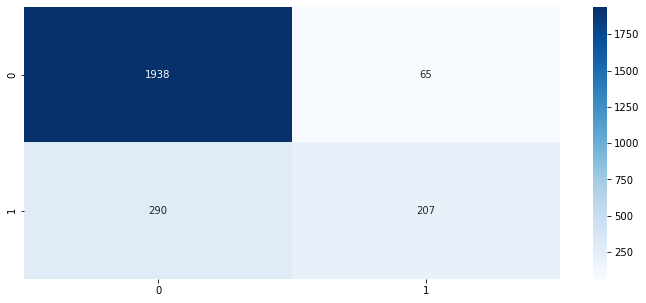

In [76]:
plt.figure(figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Blues',fmt='.4g')

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2003
           1       0.76      0.42      0.54       497

    accuracy                           0.86      2500
   macro avg       0.82      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500



In [52]:
def return_feature_importances(model):

    """
    Pass in the tree model variable
    """

    importances = model.feature_importances_
    features = pd.DataFrame({'Features':X.columns, 'Importances': importances})
    features = features.sort_values('Importances', ascending = False)
    
    plt.figure(figsize = (16,6))
    sns.barplot(x= 'Features', y ='Importances', data = features)
    plt.xticks(rotation = 90)
    
    return features

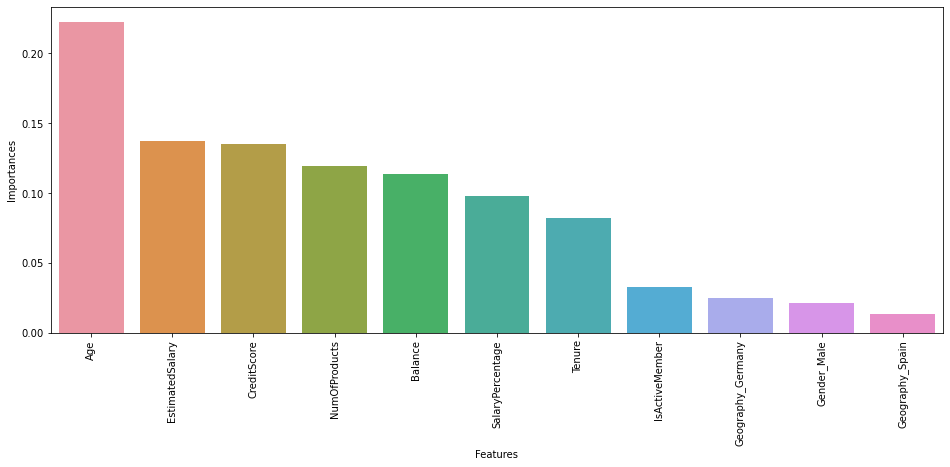

In [53]:
features = return_feature_importances(classifier)

In [54]:
features

,Features,Importances
1,Age,0.222200
6,EstimatedSalary,0.137497
0,CreditScore,0.134988
4,NumOfProducts,0.119152
3,Balance,0.113479
7,SalaryPercentage,0.097623
2,Tenure,0.082547
5,IsActiveMember,0.032867
8,Geography_Germany,0.024628
10,Gender_Male,0.021414
